<a href="https://colab.research.google.com/github/sbuitragoo/UN-Subjects/blob/main/TeoriaDeSe%C3%B1ales/Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy

## Libraries

In [ ]:
import seaborn as sns 
import numpy as np
import math
import matplotlib.pyplot as plt
import unicodedata
import random
from scipy.stats import uniform,rice

## Functions

In [ ]:
#Joint
def joint(P):
  M = np.zeros((len(P),len(P)))

  for i in range(0,len(P)):
    for j in range(0,len(P)):
      M[i,j] = P[i]*P[j]
  
  return M

In [ ]:
def conditional(joi,prob):
  M = np.zeros((joi.shape))
  for i in range(0,len(joi)):
    for j in range(0,len(joi)):
      M[i,j] = joi[i,j]/prob[j]
  return M

In [ ]:
def jentropy(JP):
  M = np.zeros((len(JP),len(JP)))
  for i in range(0,len(JP)):
    for j in range(0,len(JP)):
      M[i,j] = -JP[i,j]*np.log2(JP[i,j])
      mt = np.sum(M)
  return M, mt

In [ ]:
def centropy(CP):
  M = np.zeros(len(CP))
  for i in range(0,len(CP)):
    M[i] = -CP[i,0]*np.log2(CP[i,0])
    mt = np.sum(M)
  return M, mt

##English Text

Caracteres: [' ' '.' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


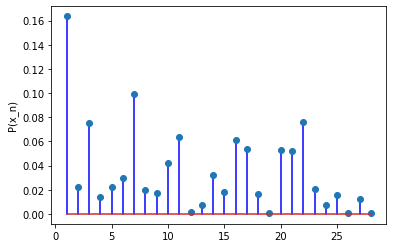

Entropy: 4.178084676264878
Joint Entropy 8.356169352529758
Conditional Entropy 4.178084676264878


In [ ]:
with open("EnglishRead.txt") as f:
    string = f.read()
    string = unicodedata.normalize("NFKD", string)
    a = np.array(list(string))
    

char, cnt = np.unique(a, return_counts=True)

x = np.linspace(1,len(cnt),len(cnt))

p = cnt/np.sum(cnt)

print('Caracteres:',char)

plt.stem(x,p, 'b')
plt.ylabel('P(x_n)')
plt.show()


H = -np.sum(p * np.log2(p))

prob = np.zeros(len(cnt))

for i in range(0,len(cnt)):
  prob[i] = cnt[i]/np.sum(cnt)

jpe = joint(prob) #Joint Probability for english text
jee, jeet = jentropy(jpe)

cpe = conditional(jpe,prob) #Conditional Probability for english text
cee, ceet = centropy(cpe)

print('Entropy:',H)
print('Joint Entropy', jeet)
print('Conditional Entropy', ceet)

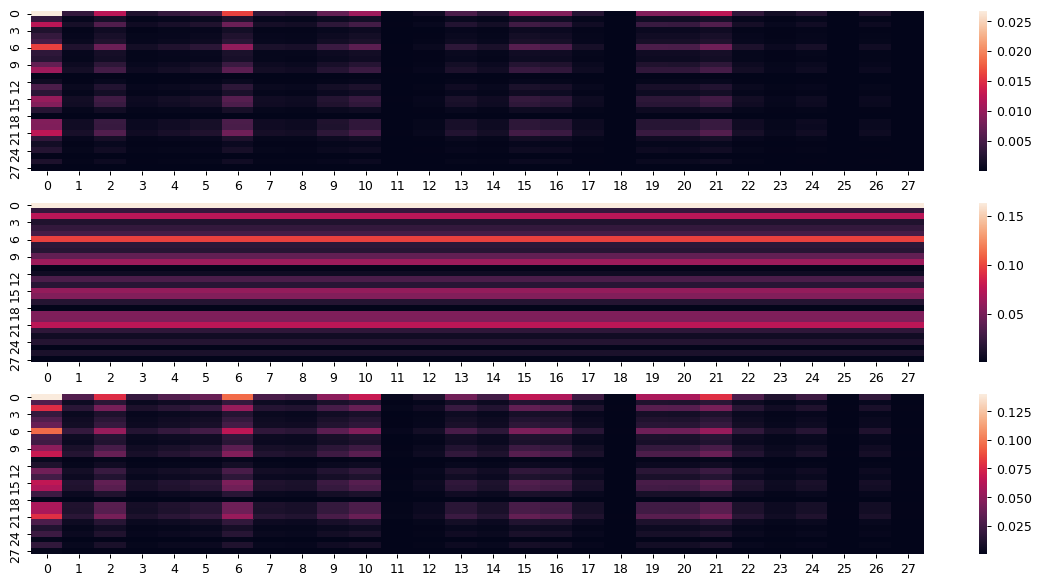

In [ ]:
#HeatMap
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(jpe)
plt.subplot(312)
heat_map_cpe = sns.heatmap(cpe)
plt.subplot(313)
heat_map_jee = sns.heatmap(jee)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


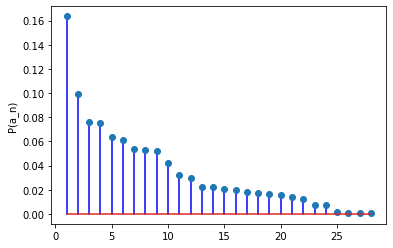

In [ ]:
#Reordered
p[::-1].sort() # P(a_n) rearrenged in decreasing order

jper = joint(p) #Joint Probability for english text
jeer, jeetr = jentropy(jper)

cper = conditional(jper,p) #Conditional Probability for english text
ceer, ceetr = centropy(cper)

plt.stem(x,p, 'b')
plt.ylabel('P(a_n)')
plt.show() 

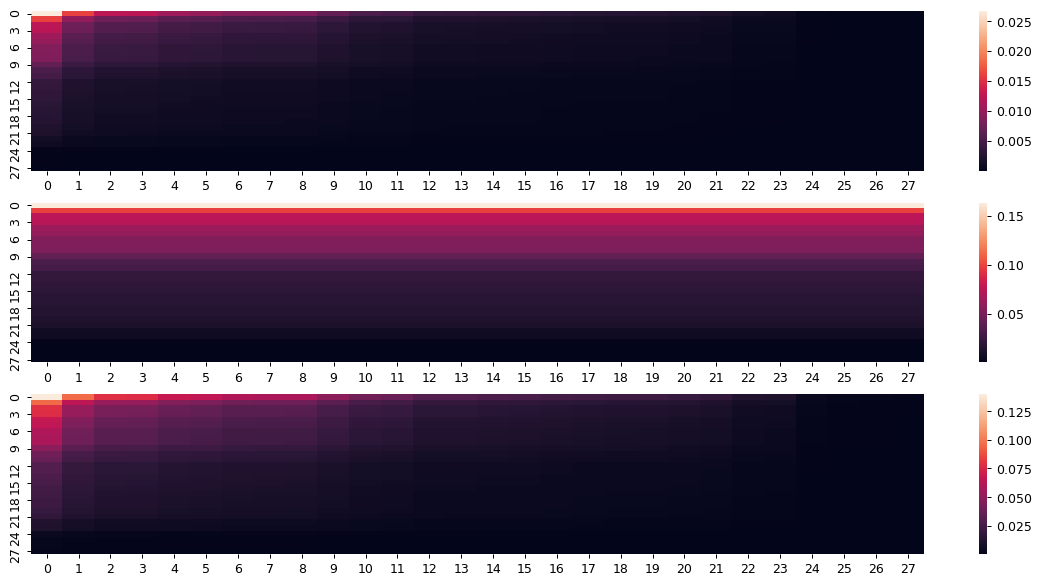

In [ ]:
#HeatMap
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(jper)
plt.subplot(312)
heat_map_cpe = sns.heatmap(cper)
plt.subplot(313)
heat_map_jee = sns.heatmap(jeer)

### Scrambling

Characters = 28 , [binary] Entropy= 4.178084676264878
Joint Entropy 8.356169352529758
Conditional Entropy 4.178084676264879


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


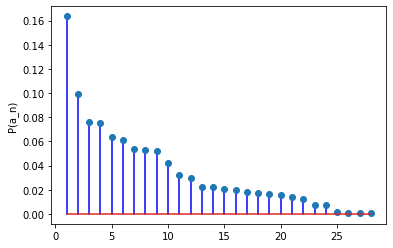

In [ ]:
with open("EnglishRead.txt") as f:
    string = f.read()
    string = unicodedata.normalize("NFKD", string)
    a = np.array(list(string))

random.shuffle(a)
#a_scrambled = ''.join(a)
chars, ecnt = np.unique(a, return_counts=True)
ps = ecnt/np.sum(ecnt)

Hs = -np.sum(ps * np.log2(ps))

prob = np.zeros(len(ecnt))

for i in range(0,len(ecnt)):
  prob[i] = ecnt[i]/np.sum(ecnt)

ps[::-1].sort() # P(a_n) rearrenged in decreasing order

jpes = joint(ps) #Joint Probability for english scrambled text
jees, jeest = jentropy(jpes)

cpes = conditional(jpes,ps) #Conditional Probability for english scrambled text
cees, ceest = centropy(cpes)

print('Characters =',len(ecnt),', [binary] Entropy=',Hs)
print('Joint Entropy', jeest)
print('Conditional Entropy', ceest)


plt.stem(x,ps, 'b')
plt.ylabel('P(a_n)')
plt.show() 

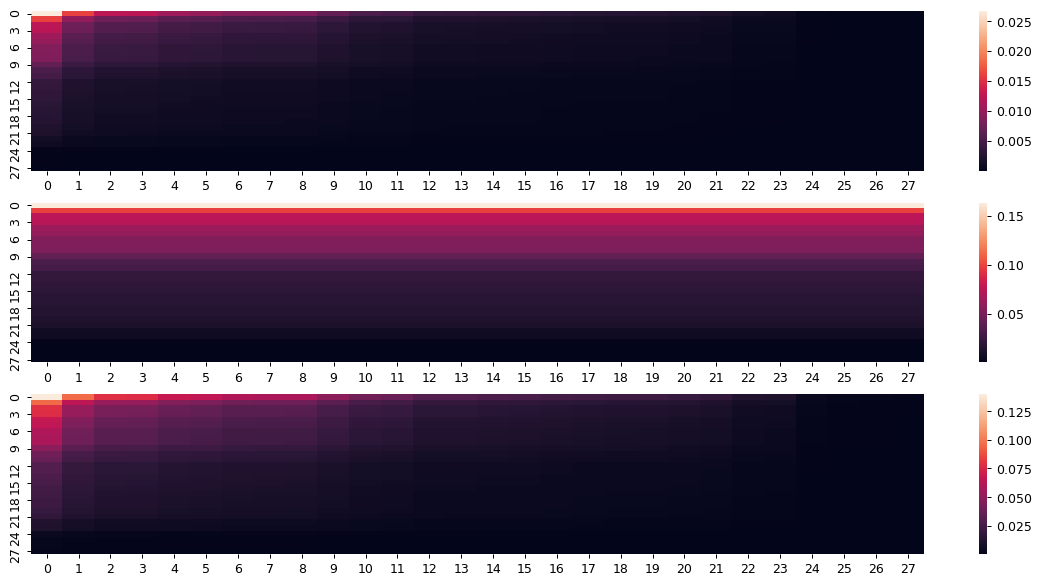

In [ ]:
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(jpes)
plt.subplot(312)
heat_map_cpe = sns.heatmap(cpes)
plt.subplot(313)
heat_map_jee = sns.heatmap(jees)

### English Text with No Punctiation

Caracteres: [' ' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q'
 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


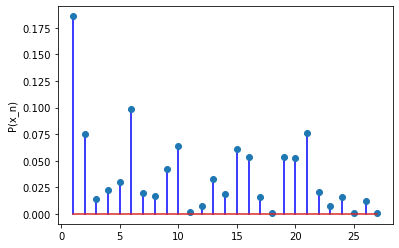

Entropy: 4.079812181862129
Joint Entropy 8.356169352529758
Conditional Entropy 4.178084676264878


In [ ]:
with open("EnglishReadN.txt") as f:
    string = f.read()
    string = unicodedata.normalize("NFKD", string)
    a = np.array(list(string))
    

char, cnt = np.unique(a, return_counts=True)

x = np.linspace(1,len(cnt),len(cnt))

p = cnt/np.sum(cnt)

print('Caracteres:',char)

plt.stem(x,p, 'b')
plt.ylabel('P(x_n)')
plt.show()


H = -np.sum(p * np.log2(p))

prob = np.zeros(len(cnt))

for i in range(0,len(cnt)):
  prob[i] = cnt[i]/np.sum(cnt)

jpen = joint(prob) #Joint Probability for english text
jeen, jeetn = jentropy(jpen)

cpen = conditional(jpen,prob) #Conditional Probability for english text
ceen, ceetn = centropy(cpen)

print('Entropy:',H)
print('Joint Entropy', jeet)
print('Conditional Entropy', ceet)

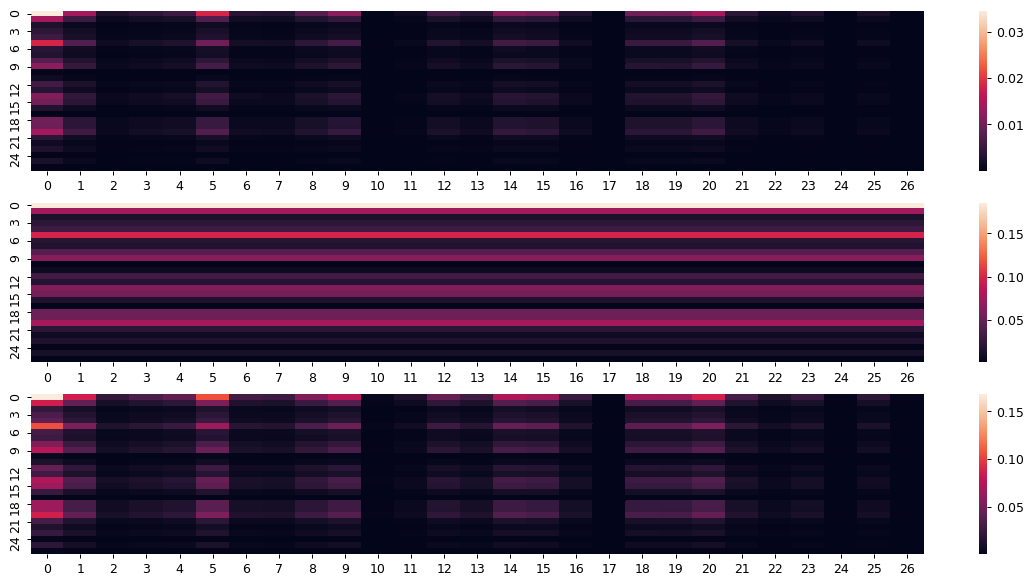

In [ ]:
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(jpen)
plt.subplot(312)
heat_map_cpe = sns.heatmap(cpen)
plt.subplot(313)
heat_map_jee = sns.heatmap(jeen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


<StemContainer object of 3 artists>

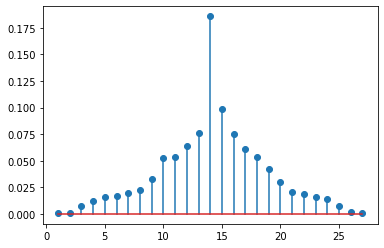

In [ ]:
n_p = np.zeros(len(p))
newp = p
n_p[13] = newp.max()
newp = newp[newp != newp.max()]
order = np.array([14,12,15,11,16,10,17,9,18,8,19,7,20,6,21,5,22,4,23,3,24,2,25,1,26,0])
for i in order:
    n_p[i] = newp.max()
    newp = newp[newp != newp.max()]

njpe = joint(n_p) #Joint Probability for english text
njee, njeet = jentropy(njpe)

ncpe = conditional(njpe,n_p) #Conditional Probability for english text
ncee, nceet = centropy(ncpe)

plt.stem(x,n_p)

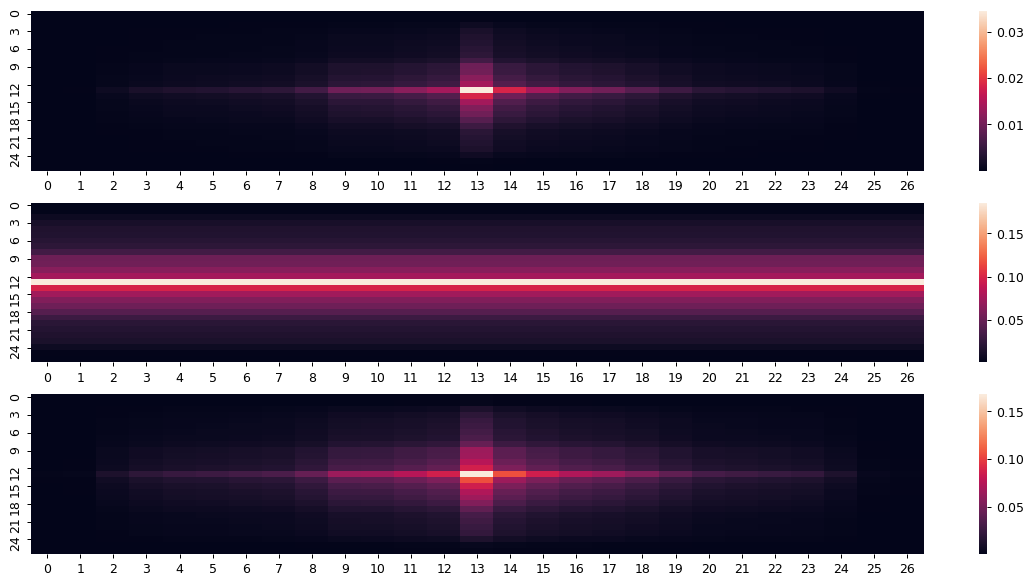

In [ ]:
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(njpe)
plt.subplot(312)
heat_map_cpe = sns.heatmap(ncpe)
plt.subplot(313)
heat_map_jee = sns.heatmap(njee)

## Spanish Text

Caracteres: [' ' '.' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'x' 'y' 'z' 'ñ']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


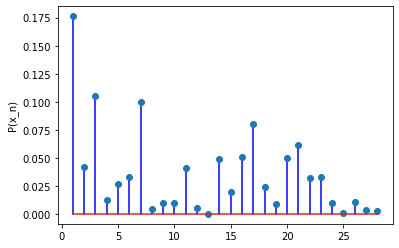

Entropy: 4.0805617578445545
Joint Entropy 8.16112351568911
Conditional Entropy 4.0805617578445545


In [ ]:
with open("SpanishText.txt") as g:
    n_string = g.read()
    #n_string = unicodedata.normalize("NFKD", n_string)
    n_string = n_string.replace('\xad', '')
    n_string = n_string.replace('\n', '')
    n_a = np.array(list(n_string))
    

n_char, n_cnt = np.unique(n_a, return_counts=True)

x = np.linspace(1,len(n_cnt),len(n_cnt))

n_p = n_cnt/np.sum(n_cnt)

print('Caracteres:',n_char)

plt.stem(x,n_p, 'b')
plt.ylabel('P(x_n)')
plt.show()

n_H = -np.sum(n_p * np.log2(n_p))

prob = np.zeros(len(n_cnt))

for i in range(0,len(n_cnt)):
  prob[i] = n_cnt[i]/np.sum(n_cnt)

jps = joint(prob) #Joint Probability for spanish text
jes, jest = jentropy(jps)

cps = conditional(jps,prob) #Conditional Probability for spanish text
ces, cest = centropy(cps)

print('Entropy:',n_H)
print('Joint Entropy', jest)
print('Conditional Entropy', cest)

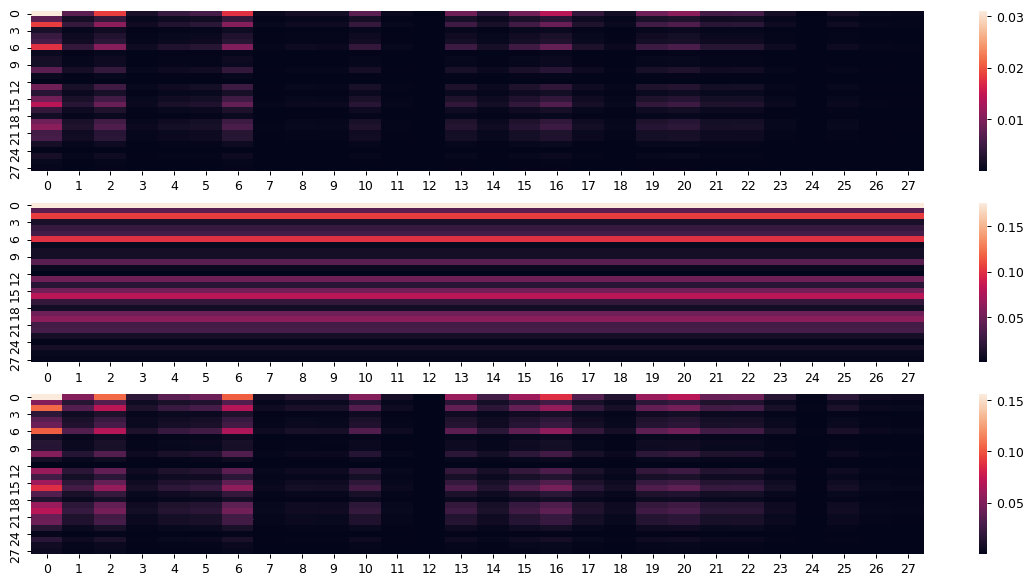

In [ ]:
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(jps)
plt.subplot(312)
heat_map_cpe = sns.heatmap(cps)
plt.subplot(313)
heat_map_jee = sns.heatmap(jes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


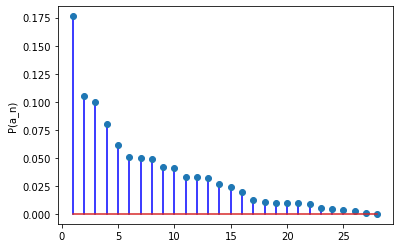

In [ ]:
n_p[::-1].sort() # P(a_n) rearrenged in decreasing order
plt.stem(x,n_p, 'b')
plt.ylabel('P(a_n)')
plt.show() 

### Scrambling

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


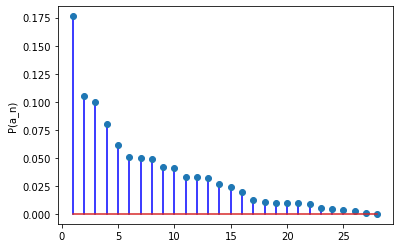

Characters = 28 , [binary] Entropy= 4.0805617578445545
Joint Entropy 8.16112351568911
Conditional Entropy 4.0805617578445545


In [ ]:
with open("SpanishText.txt") as g:
    n_string = g.read()
    #n_string = unicodedata.normalize("NFKD", n_string)
    n_string = n_string.replace('\xad', '')
    n_string = n_string.replace('\n', '')
    n_a = np.array(list(n_string))

random.shuffle(n_a)
#a_scrambled = ''.join(a)
n_chars, scnt = np.unique(n_a, return_counts=True)
ps = scnt/np.sum(scnt)

x = np.linspace(1,len(scnt),len(scnt))

Hs = -np.sum(ps * np.log2(ps))

prob = np.zeros(len(scnt))

for i in range(0,len(scnt)):
  prob[i] = scnt[i]/np.sum(scnt)

ps[::-1].sort() # P(a_n) rearrenged in decreasing order
plt.stem(x,ps, 'b')
plt.ylabel('P(a_n)')
plt.show() 

jpss = joint(ps) #Joint Probability for spanish scrambled text
jess, jesst = jentropy(jpss)

cpss = conditional(jpss,ps) ##Conditional Probability for spanish scrambled text
cess, cesst = centropy(cpss)



print('Characters =',len(scnt),', [binary] Entropy=',Hs)
print('Joint Entropy', jesst)
print('Conditional Entropy', cesst)

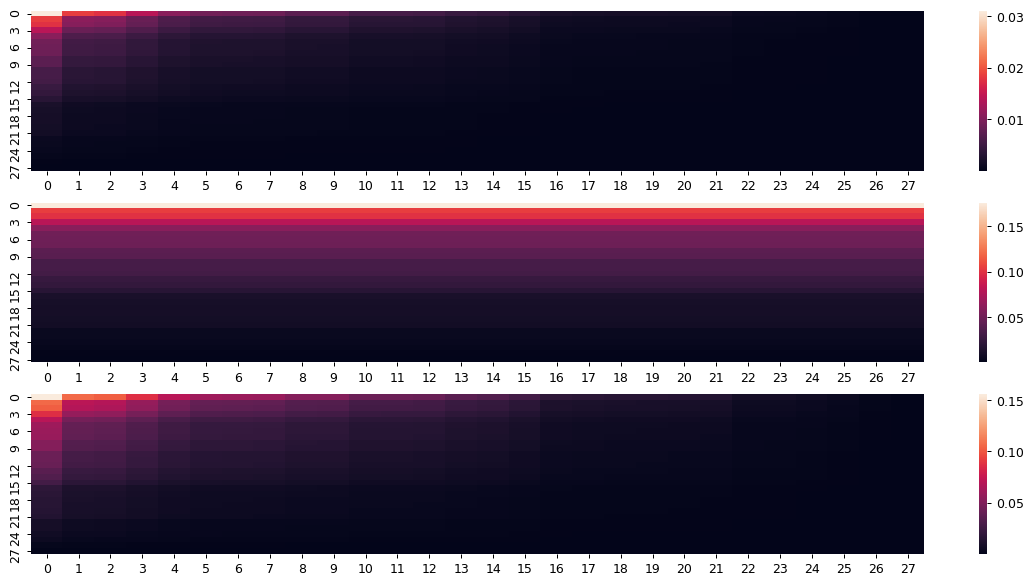

In [ ]:
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(jpss)
plt.subplot(312)
heat_map_cpe = sns.heatmap(cpss)
plt.subplot(313)
heat_map_jee = sns.heatmap(jess)

### Spanish Text with No Punctuation

Caracteres: ['\n' ' ' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'x' 'y' 'z' '\xad' '̃']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


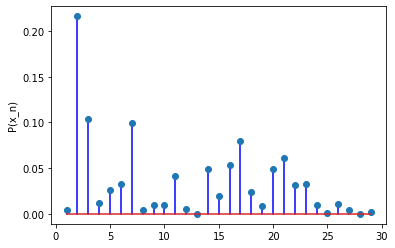

Entropy: 3.951632728605726
Joint Entropy 8.356169352529758
Conditional Entropy 4.178084676264878


In [ ]:
with open("SpanishTextN.txt") as f:
    string = f.read()
    string = unicodedata.normalize("NFKD", string)
    a = np.array(list(string))
    

char, cnt = np.unique(a, return_counts=True)

x = np.linspace(1,len(cnt),len(cnt))

p = cnt/np.sum(cnt)

print('Caracteres:',char)

plt.stem(x,p, 'b')
plt.ylabel('P(x_n)')
plt.show()


H = -np.sum(p * np.log2(p))

prob = np.zeros(len(cnt))

for i in range(0,len(cnt)):
  prob[i] = cnt[i]/np.sum(cnt)

jps = joint(prob) #Joint Probability for spanish text 
jes, jest = jentropy(jps)

cps = conditional(jps,prob) #Conditional Probability for spanish text
ces, cest = centropy(cps)

print('Entropy:',H)
print('Joint Entropy', jeet)
print('Conditional Entropy', ceet)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

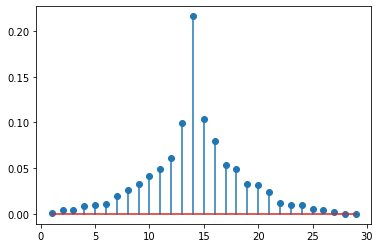

In [ ]:
n_p = np.zeros(len(p))
newp = p
n_p[13] = newp.max()
newp = newp[newp != newp.max()]
order = np.array([14,12,15,11,16,10,17,9,18,8,19,7,20,6,21,5,22,4,23,3,24,2,25,1,26,0])
for i in order:
    n_p[i] = newp.max()
    newp = newp[newp != newp.max()]

njps = joint(n_p) #Joint Probability for english text
njes, njest = jentropy(njps)

ncps = conditional(njps,n_p) #Conditional Probability for english text
nces, nceet = centropy(ncps)


plt.stem(x,n_p)

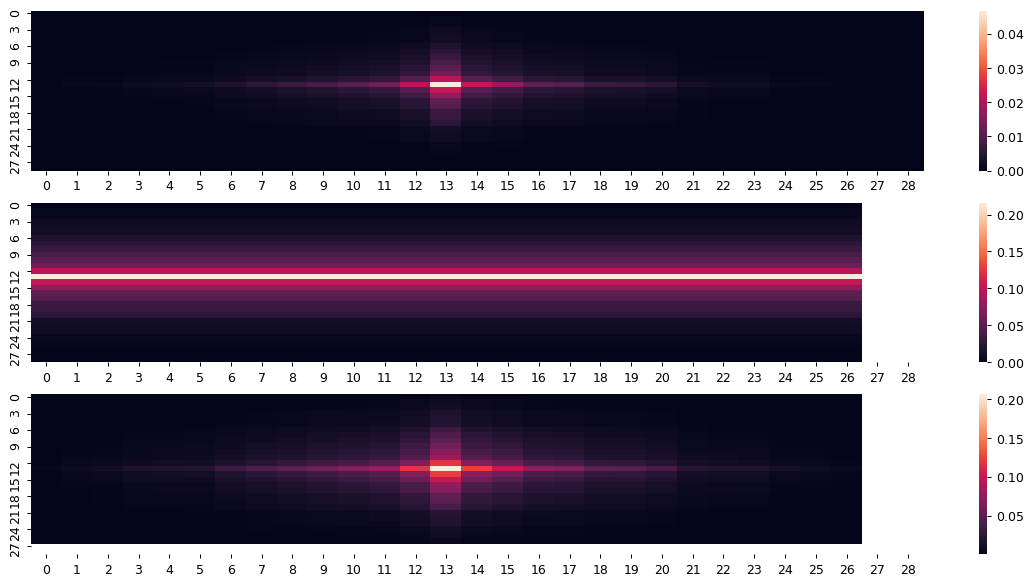

In [ ]:
plt.figure(figsize=(16,8),dpi=90)
plt.subplot(311)
heat_map_jpe = sns.heatmap(njps)
plt.subplot(312)
heat_map_cpe = sns.heatmap(ncps)
plt.subplot(313)
heat_map_jee = sns.heatmap(njes)